In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("../data/flights.csv")
data

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,...,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,Endeavor Air Inc.
336772,336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,...,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,Endeavor Air Inc.
336773,336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,...,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,Envoy Air
336774,336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,...,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00,Envoy Air


In [2]:
pairs = data[["origin", "dest", "distance"]]
dists = data[["distance"]]

from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity="precomputed")

airports = list(set(list(pairs["origin"]) + list(pairs["dest"])))

lookup = (
    pairs.groupby(["origin", "dest"])["distance"]
    .mean()
    .to_dict()
)

n = len(airports)
D = np.full((n, n), np.nan)

airport_index = {airport: i for i, airport in enumerate(airports)}

for (origin, dest), mean_dist in lookup.items():
    i, j = airport_index[origin], airport_index[dest]
    D[i, j] = mean_dist

for i in range(n):
    D[i, i] = 0

In [3]:
from scipy.sparse.csgraph import shortest_path
D_filled = shortest_path(np.nan_to_num(D, nan=np.inf), directed=False)

In [8]:
coords = mds.fit_transform(D_filled)

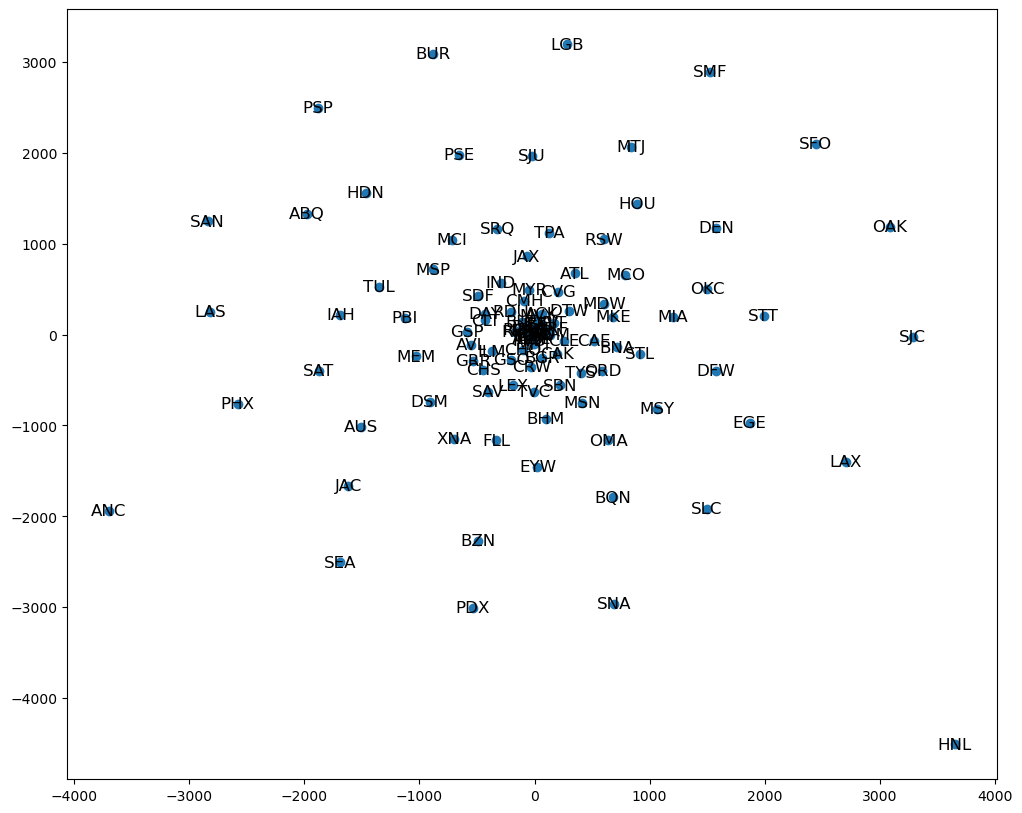

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))w
plt.scatter(coords[:, 0], coords[:, 1])

for i, code in enumerate(airports):
    plt.text(coords[i, 0], coords[i, 1], code, fontsize=12, ha="center", va="center")

plt.show()

# Nicht sinnvoll wegen rekonstruirten Wegen

In [40]:
data = pd.read_csv("../data/worldcities.csv")
data = data[data["population"] > 1000000]
data

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6870,139.7495,Japan,JP,JPN,Tōkyō,primary,37785000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
739,Volgograd,Volgograd,48.7086,44.5147,Russia,RU,RUS,Volgogradskaya Oblast’,admin,1004763.0,1643577201
740,Morelia,Morelia,19.7683,-101.1894,Mexico,MX,MEX,Michoacán,admin,1002461.0,1484669072
741,Kota,Kota,25.1800,75.8300,India,IN,IND,Rājasthān,NaN,1001694.0,1356820310
742,Quetta,Quetta,30.1833,67.0000,Pakistan,PK,PAK,Balochistan,admin,1001205.0,1586556108


In [41]:
lat_lon = data[["lat", "lng"]].to_numpy()
lat = np.radians(lat_lon[:, 0])
lon = np.radians(lat_lon[:, 1])

# kugelkoordinaten:
R = 6371.0

x = R * np.cos(lat) * np.cos(lon)
y = R * np.cos(lat) * np.sin(lon)
z = R * np.sin(lat)

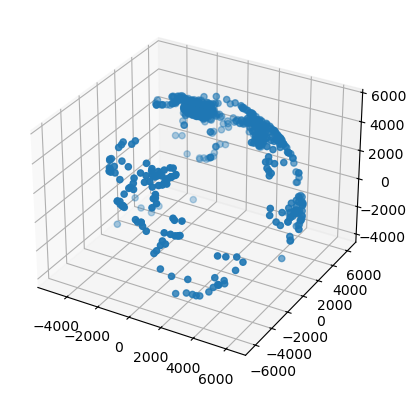

In [42]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z);

In [44]:
from scipy.spatial.distance import pdist, squareform
coords = np.column_stack((x, y, z))

D = squareform(pdist(coords))

In [31]:
coords2d = mds.fit_transform(D)

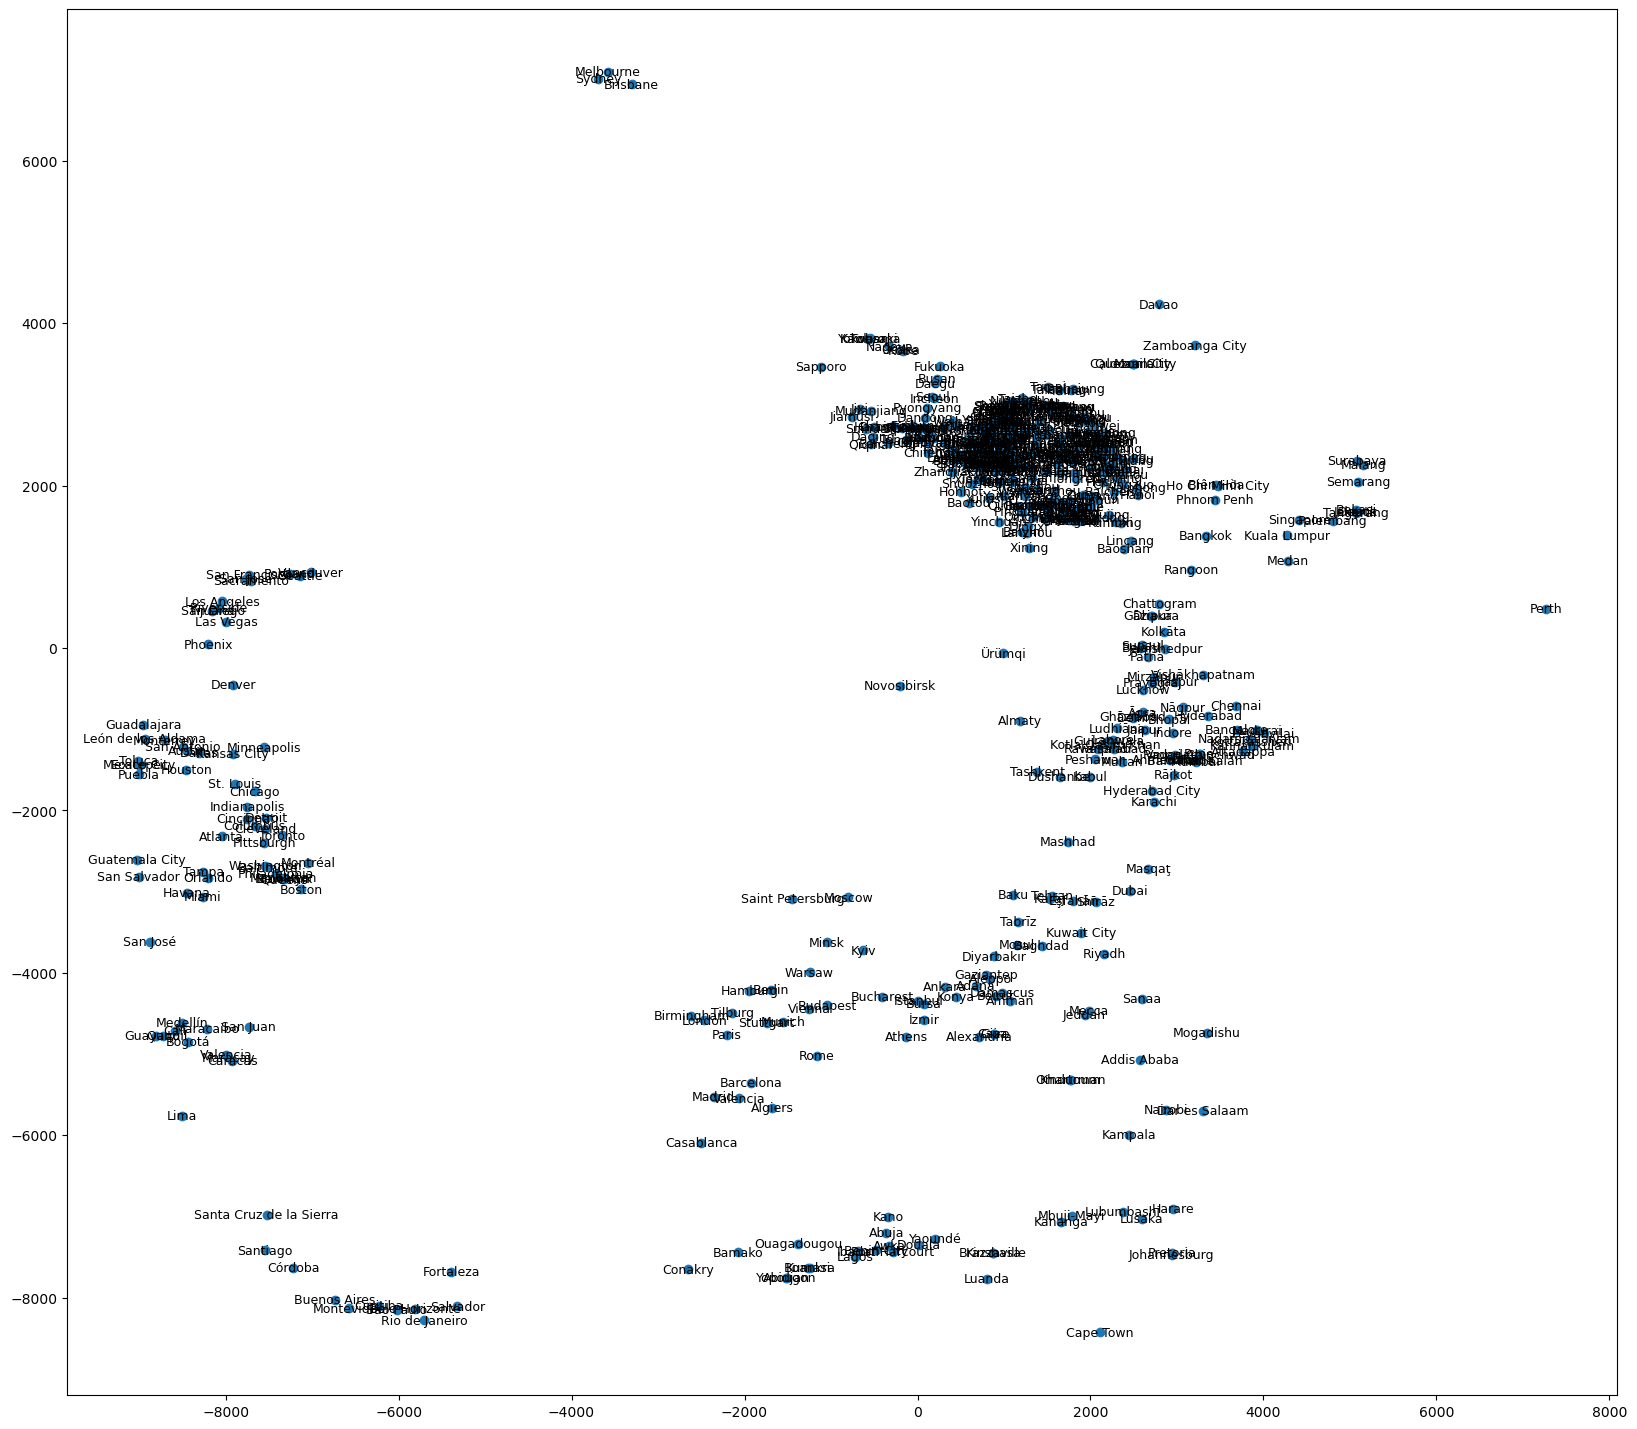

In [34]:
def visualize(coords2d):
    plt.figure(figsize=(20, 18))
    plt.scatter(coords2d[:, 0], coords2d[:, 1])
    for i, name in enumerate(data["city"]):
        plt.text(coords2d[i, 0], coords2d[i, 1], name, fontsize=9, ha="center", va="center")

visualize(coords2d)

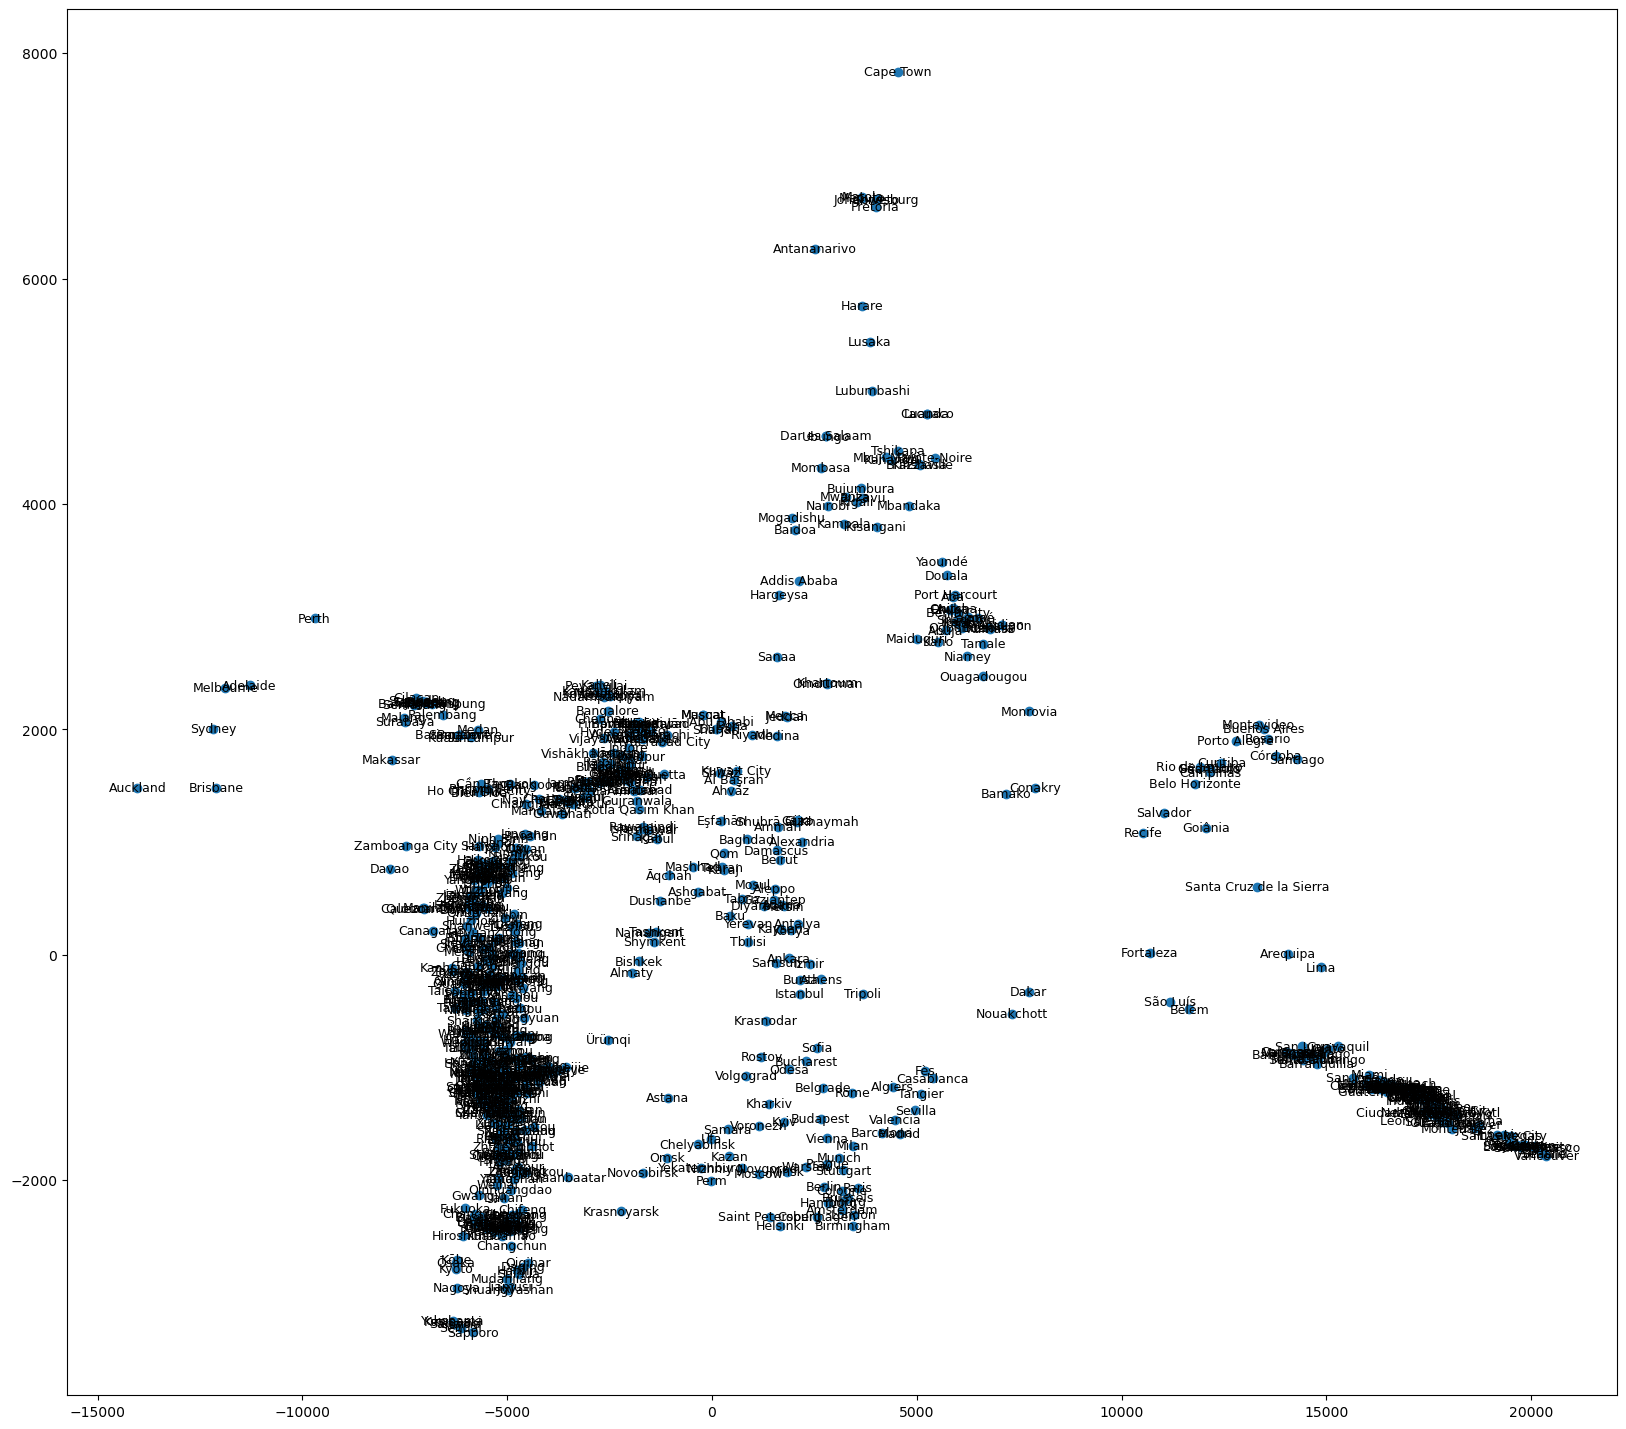

In [50]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2, n_neighbors=25)
coords2d = isomap.fit_transform(coords)

visualize(coords2d)